In [1]:
import pandas as pd
import os

In [2]:
datadir = r"C:\Users\jarry\Documents\Python Scripts\Teraco Coding Production\All Teraco Data\Operations CT1\Data"

In [3]:
directory = []
for file in os.listdir(datadir):
    if file[-4:] == ".csv":
        directory.append(file)

In [6]:
frames_list = []
columns_list = []

for file in directory:

    try:
        frame = pd.read_csv(os.path.join(datadir, file), delimiter=';', index_col="Timestamp", parse_dates=True,
                            low_memory=False)
    except:
        frame = pd.read_csv(os.path.join(datadir, file), index_col="Timestamp", parse_dates=True, low_memory=False)

    try:
        frame.drop(["Unnamed: 0"], axis=1, inplace=True)
    except:
        pass

    frames_list.append(frame)

    for column in frame.columns:
        if column in columns_list:
            pass
        else:
            columns_list.append(column)

    os.remove(os.path.join(datadir, file))

new_frame = pd.DataFrame()
for column in columns_list:
    new_column = pd.DataFrame()
    for frame in frames_list:
        try:
            new_column = pd.concat([new_column, frame[column]])
            new_column.sort_index(inplace = True)
        except:
            pass

    new_column = new_column[~new_column.index.duplicated(keep='first')]
    new_frame = pd.concat([new_frame, new_column], axis=1)
    
new_frame.columns = columns_list
new_frame.replace({",": "."}, regex=True, inplace=True)
new_frame["Timestamp"] = new_frame.index
new_frame.reset_index(inplace = True, drop = True)

new_frame.to_csv(os.path.join(datadir, "Master.csv"))
new_frame.index = new_frame["Timestamp"]
new_frame.drop(["Timestamp"], axis = 1, inplace = True)

In [7]:
new_frame.columns

Index(['C_TEM2.TEM2A_GenController#Real Energy Into the Load#kWh',
       'C_TEM2.TEM2B_GenController#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_CCL_UPS_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_A_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_B_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Generator_C_Supply#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_A#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_B#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_HVAC_System_C#Real Energy Into the Load#kWh',
       'CT1_TEM1.C1_TEM1_Main_Incomer_HT#Real Energy Into the Load#kWh',
       'CT1_TEM1_Old.C_DC_1_UPS_A_Output#Real Energy Into the Load#kWh',
       'CT1_TEM1_Old.C_DC_1_UPS_B_Output#Real Energy Into

<AxesSubplot:xlabel='Timestamp'>

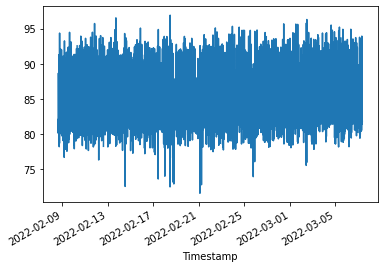

In [12]:
new_frame['CT1_TEM2.C_TEM_2_MLV_B_UPS#Real Energy Into the Load#kWh'].diff().plot()